# Démonstration

<img src="src/imgs/ok_isen.png" style="width:400px"/>

L'objectif de cet démonstration est de mettre en pratique les différents éléments vus et étudiés dans le **compte-rendu**. Après avoir configuré les différents paramètres du système et éduqué le réseau de neurones artificiels, ce notebook va simuler l'éxécution complète du système en essayant de détecter la présence du mot-clé d'activation **OK ISEN !** directement depuis le microphone de l'ordinateur, et ce même dans un environnement bruité.

Notez que **[pyaudio](https://people.csail.mit.edu/hubert/pyaudio/)** doit être installé sur la machine (le chemin ci-dessous doit correspondre au dossier d'installation de pyaudio).

Les trois cellules suivantes n'ont besoin d'être exécutées qu'une seule fois lors de l'ouverture du fichier.

In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2 
%matplotlib notebook
from bin import *

In [2]:
%%html
<script>IPython.OutputArea.prototype._should_scroll = lines => { return false }</script>
<style>.output_wrapper button.btn.btn-default, .output_wrapper .ui-dialog-titlebar { display: none; } .ui-resizable { pointer-events:none; } .widget-hprogress { width: auto; }</style>

In [ ]:
filters, filters_fq = gen_filters(fmin=75, fmax=5000, nb_filters=6, q=1, n=3, fs=48000)
predict = learning(
    folder_learn="src/learning/", folder_test="src/learning/",
    learn=["ok_isen-{i:02}", "bruit-{i}", "silence{i:02}", "voix-{i}", "m1_{i:02}", "f1_{i:02}"], learn_v=["OK ISEN !", "Bruit", "Bruit", "Bruit", "Bruit", "Bruit"], learn_i=[276, 303, 50, 169, 40, 40], 
    neurons=(30,20,10,10),
    options={"filters":filters, "filters_fq":filters_fq, "time_res":0.025, "amp_res":4}
)

Préparation des fichiers à traiter...
   878 fichiers d'apprentissage récupérés
     0 fichiers de test récupérés
     2 valeurs (OK ISEN !, Bruit)

Acquisition des données...   878 fichiers d'apprentissage traités
     0 fichiers de test traités

Apprentissage...
   878 fichiers utilisés


# > OK ISEN !

Vous devez interrompre le kernel pour quitter l'exécution de la celulle-ci dessous.

![Stop](src/imgs/stop.png)

A Jupyter Widget

<IPython.core.display.Javascript object>


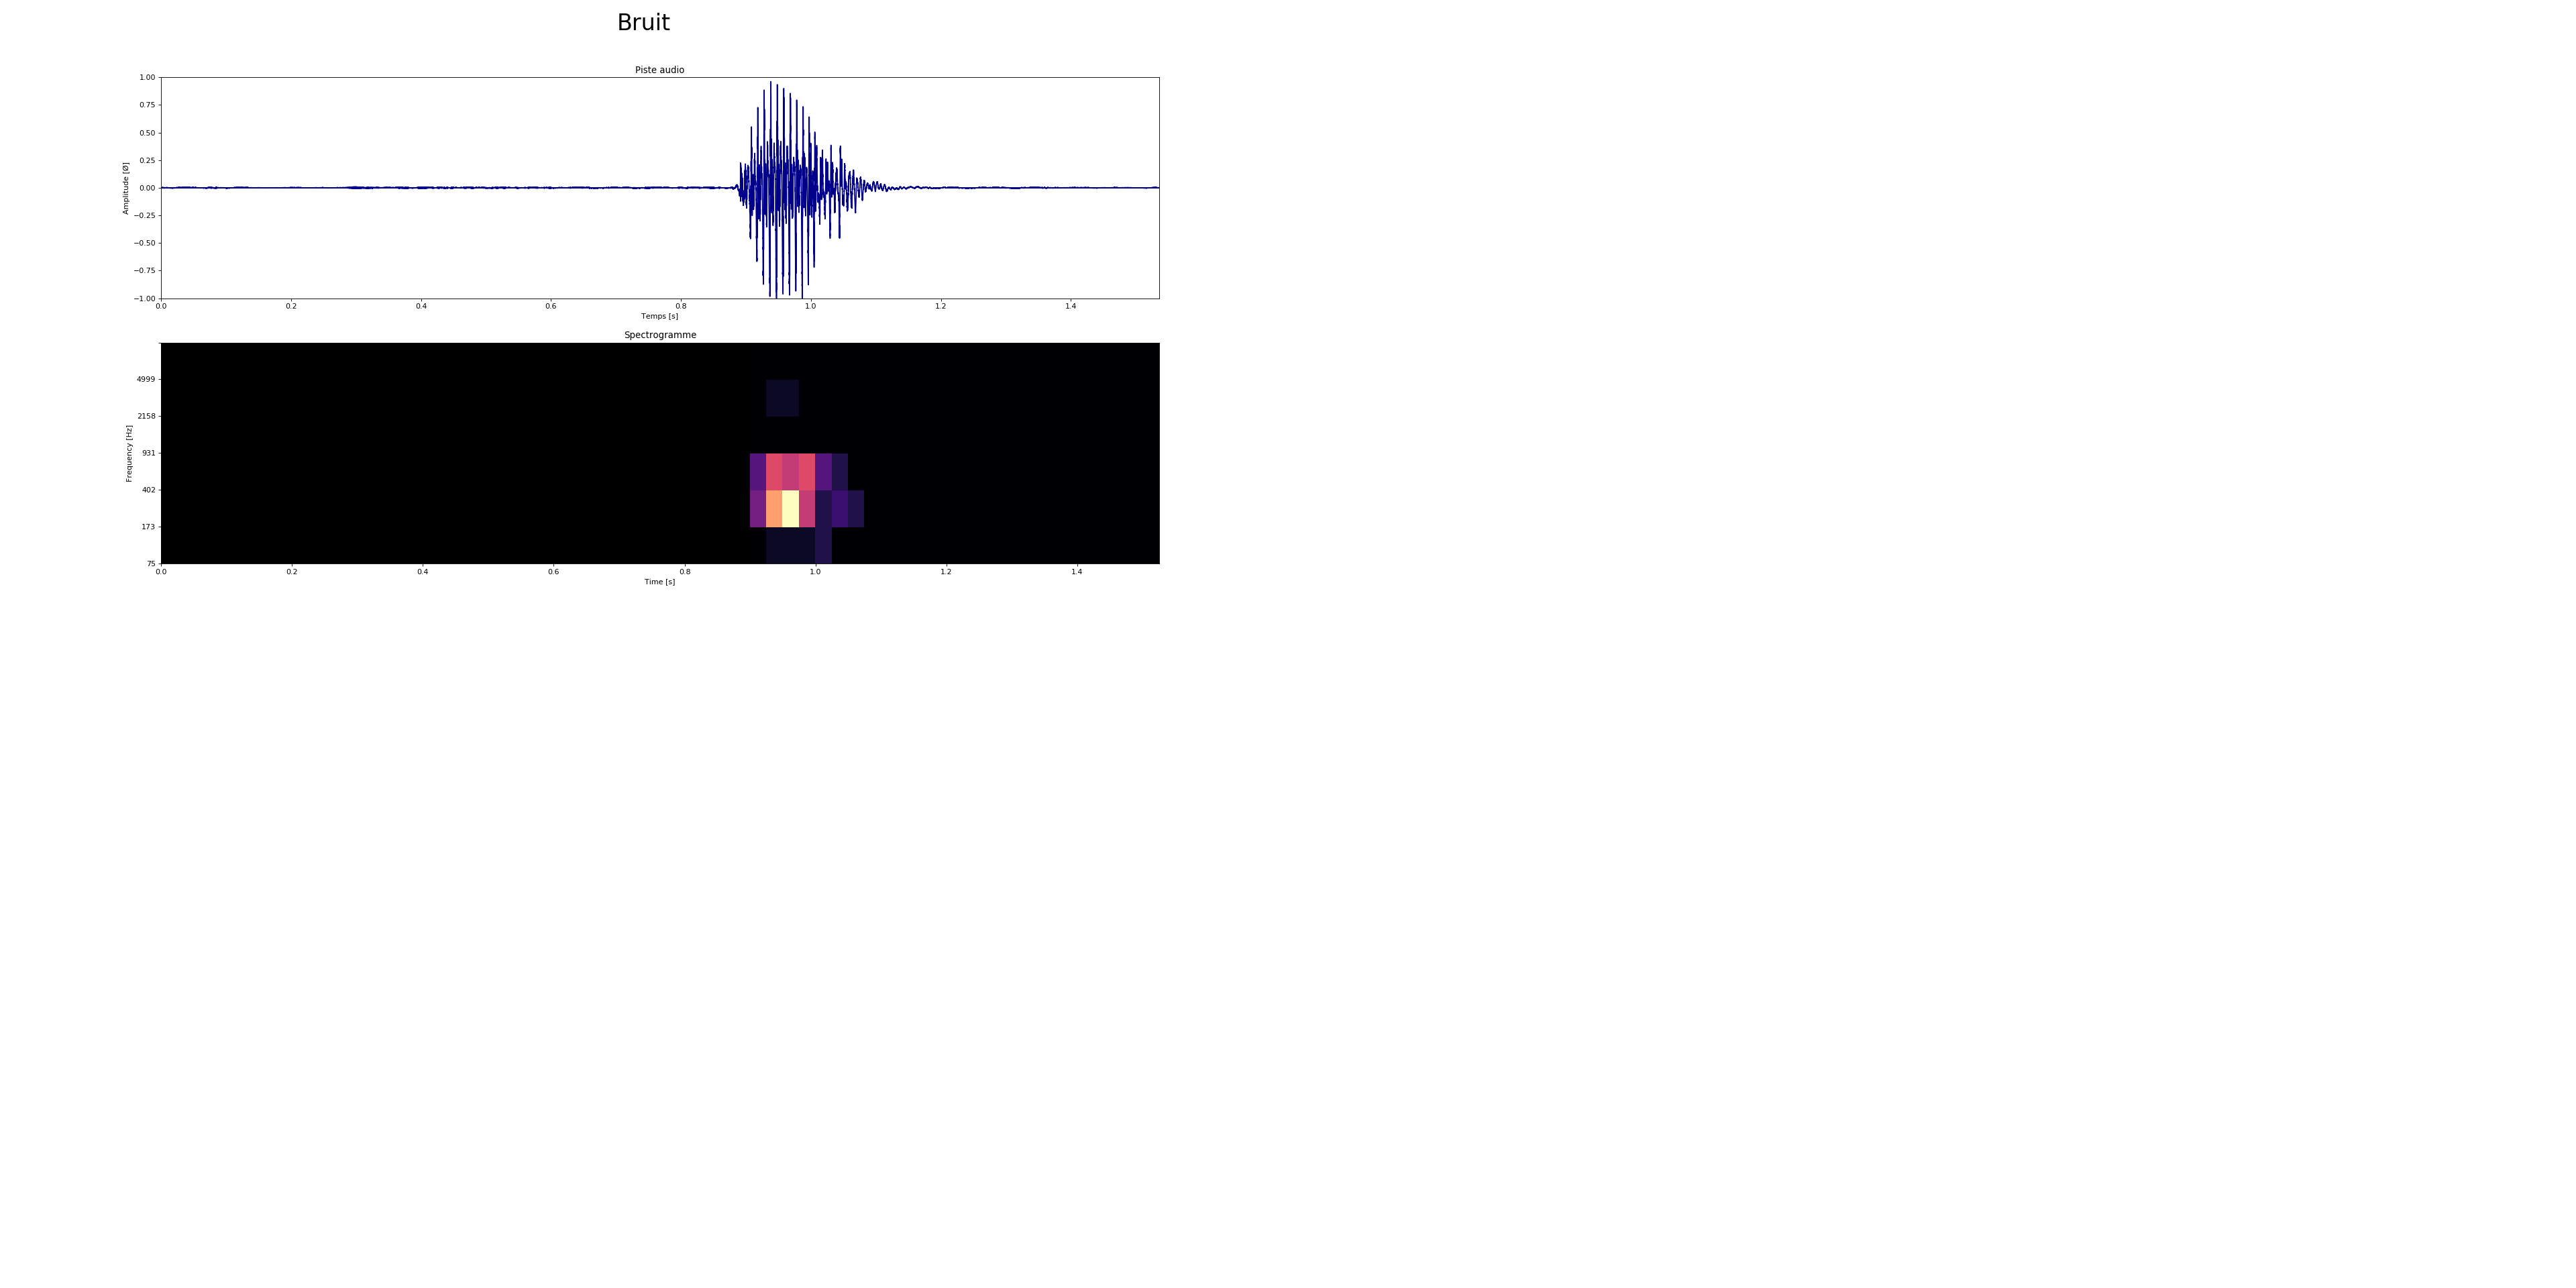

In [ ]:
sys.path.append("C:\Program Files\Python36\Lib\site-packages")
live_record(time_res=0.025, amp_res=4, filters_fq=filters_fq, filters=filters, fs=48000, last=1, predict=predict)